In [1]:
import pandas as pd
from pathlib import Path

In [2]:
pd.plotting.register_matplotlib_converters()

In [3]:
datasets_dir = Path().absolute().parent.joinpath("datasets")

## Insurange Charges Dataset

In [4]:
insurance_df = pd.read_csv(f"{datasets_dir}/insurance.csv")

In [5]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Scatter Plot

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Body Mass Index (BMI)')

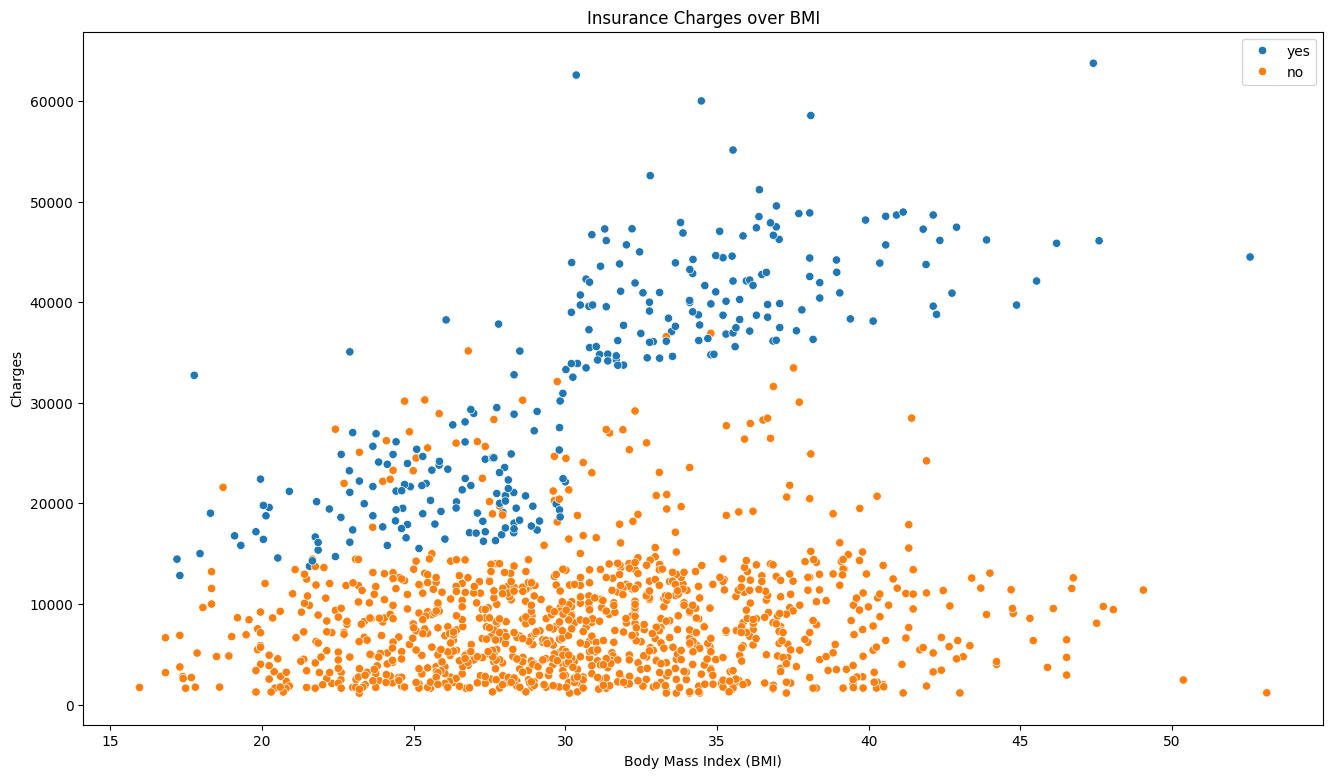

In [7]:
plt.figure(figsize=(16, 9))

sns.scatterplot(
    y=insurance_df['charges'],
    x=insurance_df['bmi'], 
    hue=insurance_df['smoker'],
)

plt.title("Insurance Charges over BMI")
plt.legend()
plt.ylabel("Charges")
plt.xlabel("Body Mass Index (BMI)")

### Scatter Plot with Linear Regression Model Line

Text(0.5, 28.999999999999986, 'Body Mass Index (BMI)')

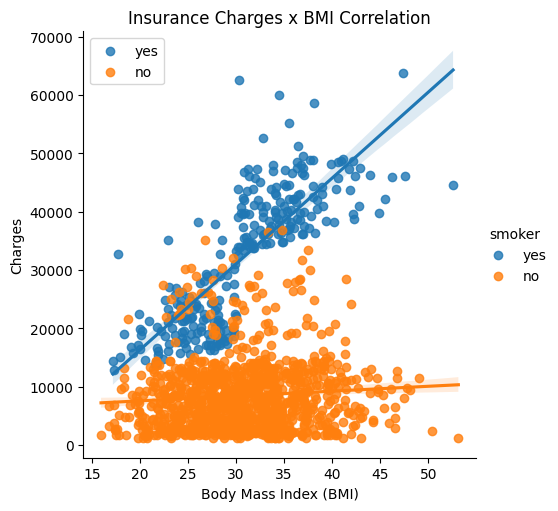

In [8]:
sns.lmplot(
    data=insurance_df,
    y="charges", 
    x="bmi", 
    hue="smoker", 
)

plt.title("Insurance Charges x BMI Correlation")
plt.legend()
plt.ylabel("Charges")
plt.xlabel("Body Mass Index (BMI)")

### Categorical Scatter Plot

Text(0.5, 69.7222222222222, 'Smoker (Yes/No)')

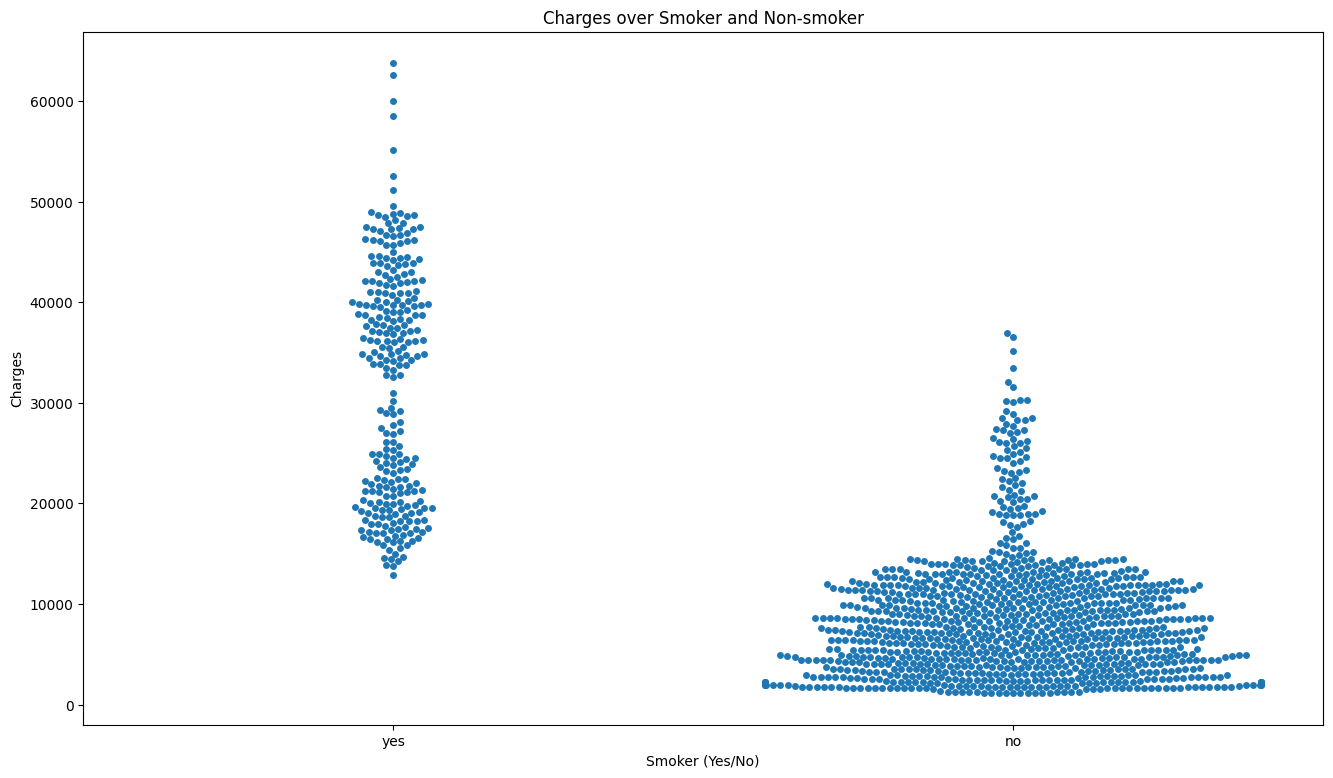

In [9]:
plt.figure(figsize=(16, 9))

sns.swarmplot(
    y=insurance_df['charges'],
    x=insurance_df['smoker'],
)

plt.title("Charges over Smoker and Non-smoker")
plt.ylabel("Charges")
plt.xlabel("Smoker (Yes/No)")

## Crowdsourced Favorite Candies

In [10]:
candy_df = pd.read_csv(f"{datasets_dir}/candy.csv", index_col='id')

In [11]:
candy_df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
id,,,,,,,,,,,,,
0,100 Grand,Yes,No,Yes,No,No,Yes,No,Yes,No,0.732,0.860,66.971725
1,3 Musketeers,Yes,No,No,No,Yes,No,No,Yes,No,0.604,0.511,67.602936
2,Air Heads,No,Yes,No,No,No,No,No,No,No,0.906,0.511,52.341465
3,Almond Joy,Yes,No,No,Yes,No,No,No,Yes,No,0.465,0.767,50.347546
4,Baby Ruth,Yes,No,Yes,Yes,Yes,No,No,Yes,No,0.604,0.767,56.914547


In [12]:
candy_df[['competitorname', 'winpercent', 'sugarpercent']]

,competitorname,winpercent,sugarpercent
id,,,
0,100 Grand,66.971725,0.732
1,3 Musketeers,67.602936,0.604
2,Air Heads,52.341465,0.906
3,Almond Joy,50.347546,0.465
4,Baby Ruth,56.914547,0.604
...,...,...,...
78,Twizzlers,45.466282,0.220
79,Warheads,39.011898,0.093
80,Welch's Fruit Snacks,44.375519,0.313


### Sugar Percent x Market Share Correlation

#### Scatter Plot

Text(0.5, 0, 'Sugar Percent')

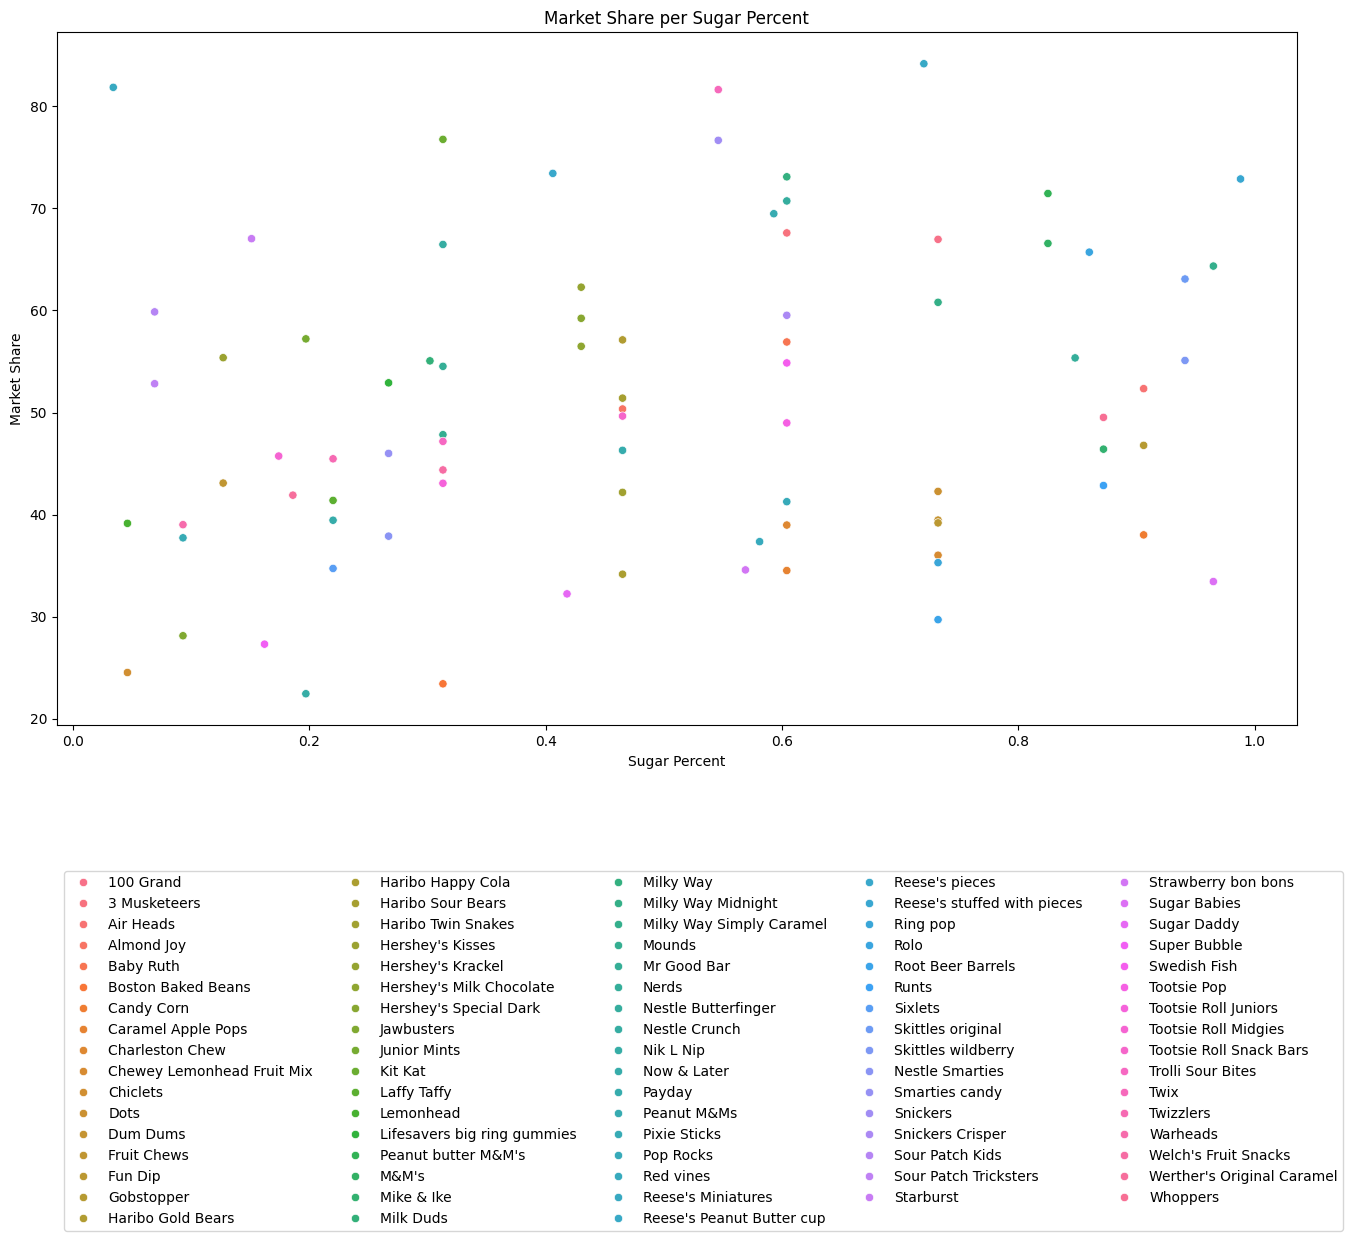

In [13]:
plt.figure(figsize=(16, 9))

sns.scatterplot(
    data=candy_df,
    y="winpercent",
    x="sugarpercent",
    hue="competitorname",
)

plt.title("Market Share per Sugar Percent")
plt.legend(loc="upper left", bbox_to_anchor=(0, -0.2), ncol=5)
plt.ylabel("Market Share")
plt.xlabel("Sugar Percent")

#### Scatter Plot with Linear Regression 

Text(0.5, 0, 'Sugar Percent')

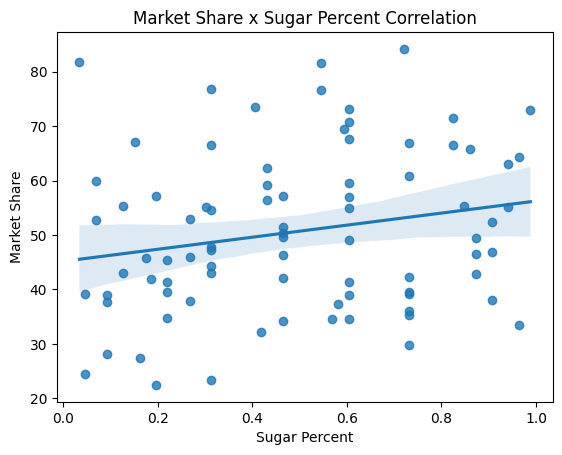

In [14]:
sns.regplot(
    data=candy_df,
    y="winpercent",
    x="sugarpercent",
)

plt.title("Market Share x Sugar Percent Correlation")
plt.ylabel("Market Share")
plt.xlabel("Sugar Percent")

#### Interpretation:
The correlation between "Sugar Percent" and "Market Share" is slighly positive, meaning that people have a slight preference for candies with more sugar

### Price Percent x Market Share Correlation

#### Scatter Plot

Text(0.5, 0, 'Price Percent')

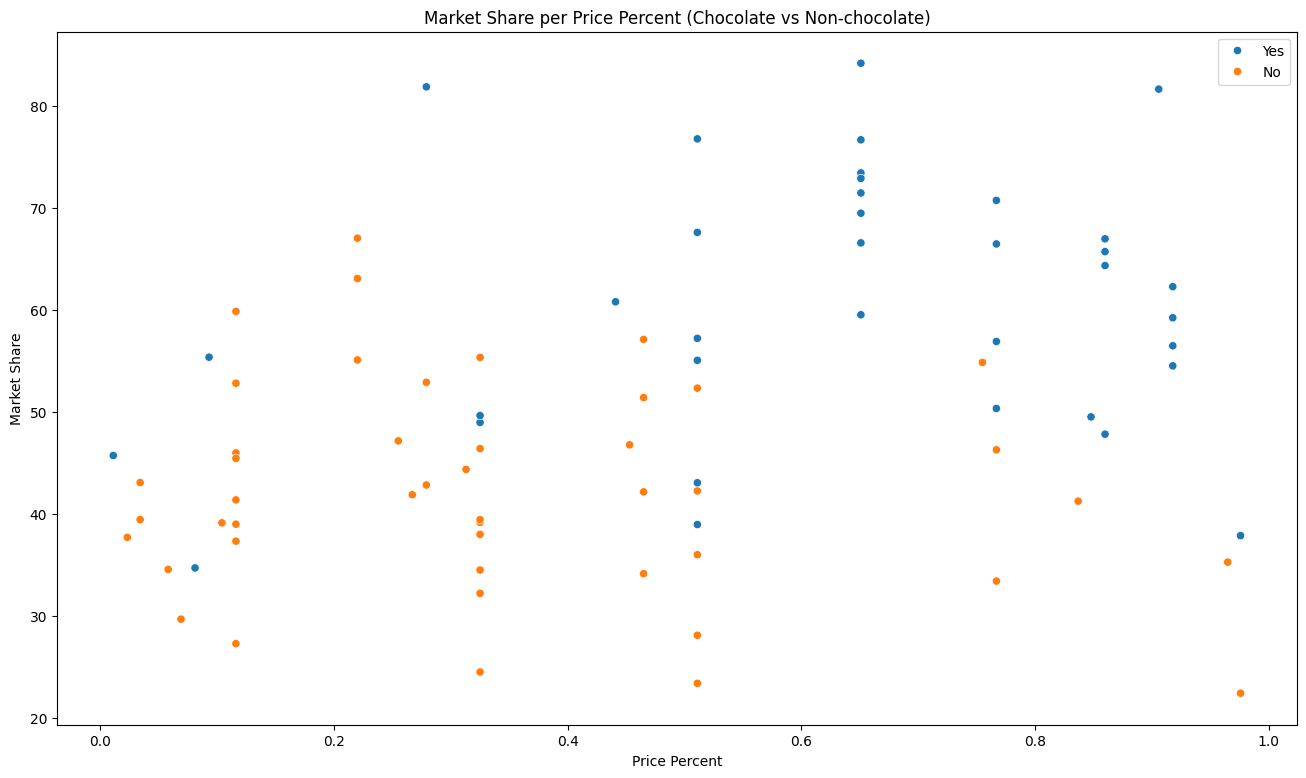

In [15]:
plt.figure(figsize=(16, 9))

sns.scatterplot(
    data=candy_df,
    y="winpercent",
    x="pricepercent",
    hue="chocolate",
)

plt.title("Market Share per Price Percent (Chocolate vs Non-chocolate)")
plt.legend()
plt.ylabel("Market Share")
plt.xlabel("Price Percent")

#### Scatter Plot with Linear Regression 

Text(0.5, 28.999999999999986, 'Price Percent')

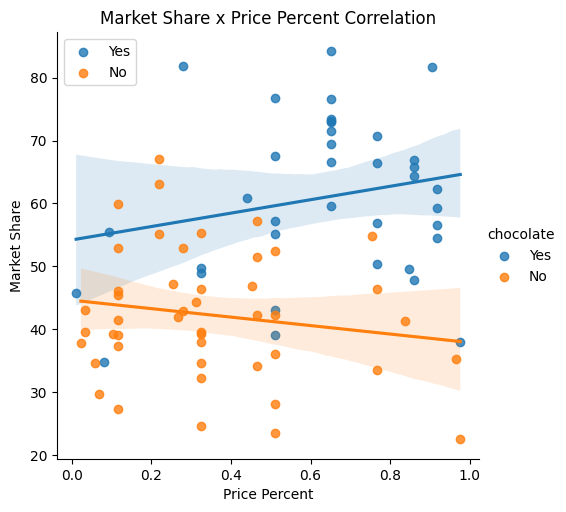

In [16]:
sns.lmplot(
    data=candy_df,
    y="winpercent",
    x="pricepercent",
    hue="chocolate",
)

plt.title("Market Share x Price Percent Correlation")
plt.legend()
plt.ylabel("Market Share")
plt.xlabel("Price Percent")

#### Interpretation:
For candies that has chocolate in their formula, there's a moderate positive correlation between "Price Percent" and "Market Share", meaning the higher the price the higher the interest on that candy.

On the other hand, candies without chocolate show an moderate negative correlation between the two variables. And, thus, meaning, the higher the price, the lower the internet.

## Chocolate x Market Share Correlation

### Categorial Plot

Text(0.5, 23.52222222222222, 'Has Chocolate?')

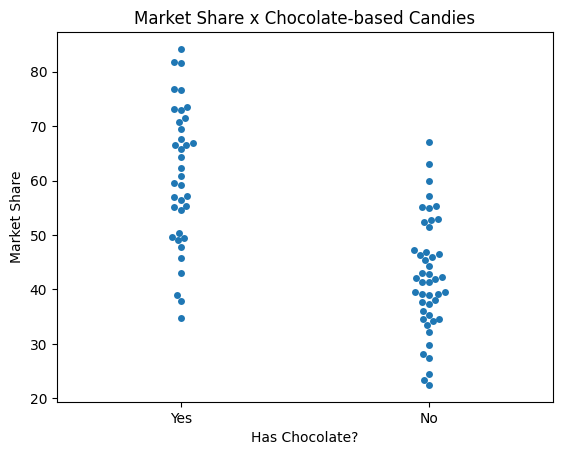

In [17]:
sns.swarmplot(
    data=candy_df,
    y="winpercent",
    x="chocolate",
)

plt.title("Market Share x Chocolate-based Candies")
plt.ylabel("Market Share")
plt.xlabel("Has Chocolate?")

#### Interpretation:
The categorial chart (swarm), although minimalistic, provides enough insight so we can see that candies containing chocolate have a better overall market share/adoption than the ones that don't have it.